In [14]:
import numpy as np

# Original data points
data = np.array([[70, 1.75], [85, 1.80], [65, 1.70], [90, 1.90]])


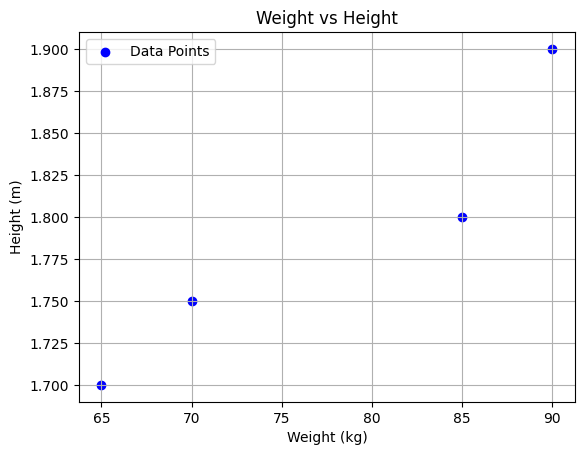

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset given by the user
data = np.array([[70, 1.75], [85, 1.80], [65, 1.70], [90, 1.90]])

# Assuming the first column is weight (kg) and the second is height (m)
weights = data[:, 0]  # First column (weight)
heights = data[:, 1]  # Second column (height)

# Plotting the dataset
plt.scatter(weights, heights, color='blue', label='Data Points')
plt.title('Weight vs Height')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (m)')
plt.grid(True)
plt.legend()
plt.show()


In [17]:
from sklearn.preprocessing import StandardScaler

# Standardizing the data so that it has a mean of 0 and variance of 1
X_std = StandardScaler().fit_transform(data)

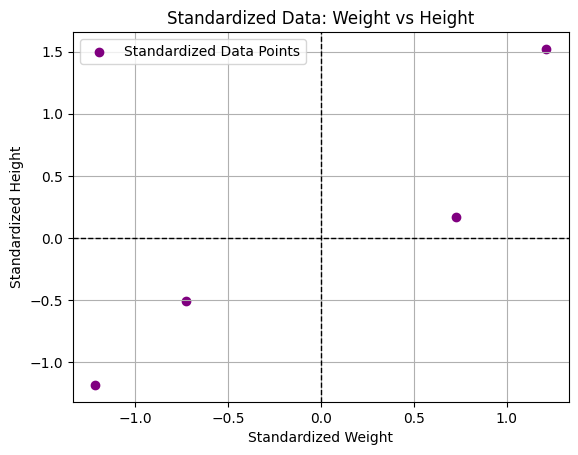

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Given dataset
data = np.array([[70, 1.75], [85, 1.80], [65, 1.70], [90, 1.90]])

# Standardizing the data to have a mean of 0 and variance of 1
X_std = StandardScaler().fit_transform(data)

# Plotting the standardized data
plt.scatter(X_std[:, 0], X_std[:, 1], color='purple', label='Standardized Data Points')
plt.title('Standardized Data: Weight vs Height')
plt.xlabel('Standardized Weight')
plt.ylabel('Standardized Height')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.legend()
plt.show()


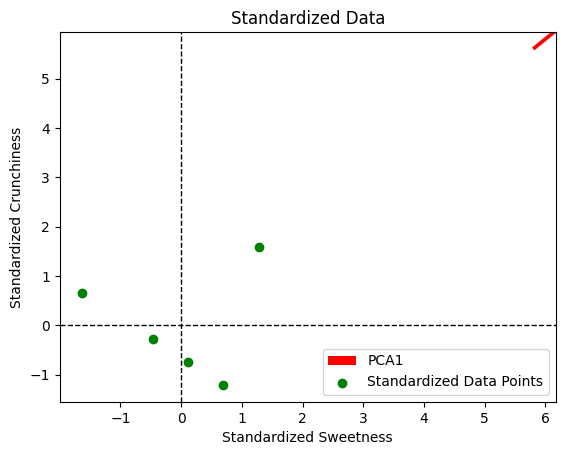

In [11]:
import matplotlib.pyplot as plt

# Plotting the principal component axis
soa = np.array([[np.mean(X[:, 0]), np.mean(X[:, 1]), principalAxes[0, 0], principalAxes[1, 0]]])
X_pca, Y_pca, U_pca, V_pca = zip(*soa)
plt.quiver(X_pca, Y_pca, U_pca, V_pca, angles='xy', scale_units='xy', scale=.5, color='red', label='PCA1')

# Plotting the standardized data
plt.scatter(X_std[:, 0], X_std[:, 1], color='green', label='Standardized Data Points')
plt.title('Standardized Data')
plt.xlabel('Standardized Sweetness')
plt.ylabel('Standardized Crunchiness')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.grid(False)
plt.legend()
plt.show()

In [6]:
from sklearn.decomposition import PCA


# Performing PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(X_std)
principalAxes = pca.components_.T * np.sqrt(pca.explained_variance_)

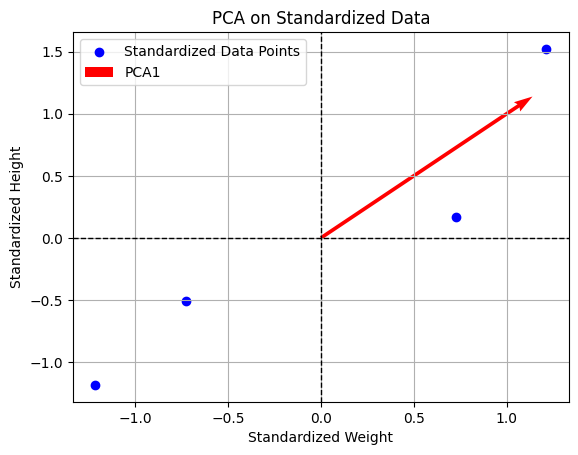

In [25]:
# Performing PCA on the standardized data
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(X_std)
principalAxes = pca.components_.T * np.sqrt(pca.explained_variance_)

# Plotting the standardized data points
plt.scatter(X_std[:, 0], X_std[:, 1], color='blue', label='Standardized Data Points')

# Plotting the principal component axis
soa = np.array([[0, 0, principalAxes[0, 0], principalAxes[1, 0]]])
X_pca, Y_pca, U_pca, V_pca = zip(*soa)
plt.quiver(X_pca, Y_pca, U_pca, V_pca, angles='xy', scale_units='xy', scale=1, color='red', label='PCA1')

# Additional plot settings
plt.title('PCA on Standardized Data')
plt.xlabel('Standardized Weight')
plt.ylabel('Standardized Height')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.legend()
plt.show()


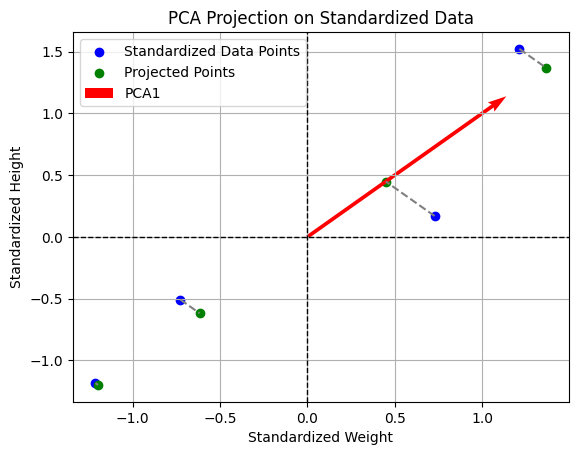

,Std Weight,Std Height,Projected Weight,Projected Height
0,-0.727607,-0.507093,-0.617350,-0.617350
1,0.727607,0.169031,0.448319,0.448319
2,-1.212678,-1.183216,-1.197947,-1.197947
3,1.212678,1.521278,1.366978,1.366978


In [26]:
# Calculating the projected points
X_projected = pca.inverse_transform(principalComponents)

# Preparing data for the table
projected_data = np.hstack((X_std, X_projected))

# Plotting the standardized data points and their projections
plt.scatter(X_std[:, 0], X_std[:, 1], color='blue', label='Standardized Data Points')
plt.scatter(X_projected[:, 0], X_projected[:, 1], color='green', label='Projected Points')

# Plotting the principal component axis
plt.quiver(X_pca, Y_pca, U_pca, V_pca, angles='xy', scale_units='xy', scale=1, color='red', label='PCA1')

# Drawing lines between original and projected points
for i in range(X_std.shape[0]):
    plt.plot([X_std[i, 0], X_projected[i, 0]], [X_std[i, 1], X_projected[i, 1]], color='gray', linestyle='--')

# Additional plot settings
plt.title('PCA Projection on Standardized Data')
plt.xlabel('Standardized Weight')
plt.ylabel('Standardized Height')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.legend()
plt.show()

# Printing the table
import pandas as pd

# Create a DataFrame for the table
df = pd.DataFrame(projected_data, columns=['Std Weight', 'Std Height', 'Projected Weight', 'Projected Height'])
df
